回归系数w的置信区间:[2.324090343, 2.561690598]
回归系数b的置信区间:[-74.25463155, -47.88641159]


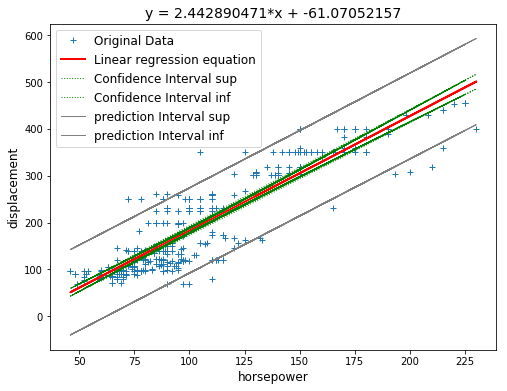

拟合优度R2 = 0.80495   修正R2 = 0.80446
F = 1634.28992   P = 1.249741e-142
----------------------------------------------------------------------------------------------------
1. 标准化残差的绝对值大于2的样本序号:
[ 12  23  25  26  27  28  36  48  71  91 100 103 116 154 155 180 200 243
 263 276 277 298 300 333 334 364 387]
2. 学生化残差的绝对值大于2的样本序号:
[ 12  23  25  26  27  28  36  48  71  91 100 103 116 154 155 180 200 243
 263 276 277 298 300 333 334 364 387]
3. 高杠杆值的样本序号:
[  5   6   7   8   9  13  25  26  27  28  39  42  44  63  67  70  85  90
  94  95  96 106 116 124 212 229 231]
4. 强影响点的样本序号:
[ 12  25  26  27  28  91 103 116 154 155 200 243 263 277 298 333 364 387]


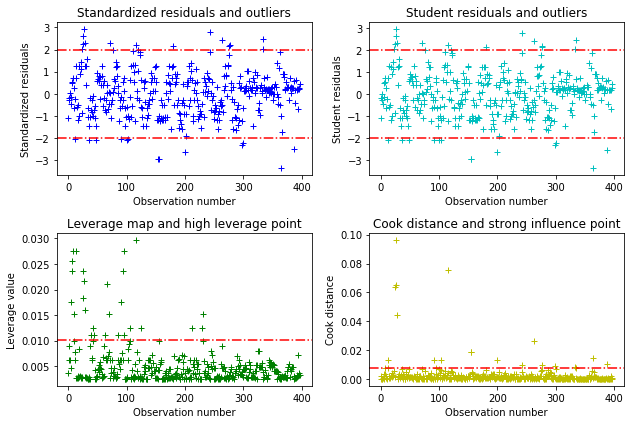

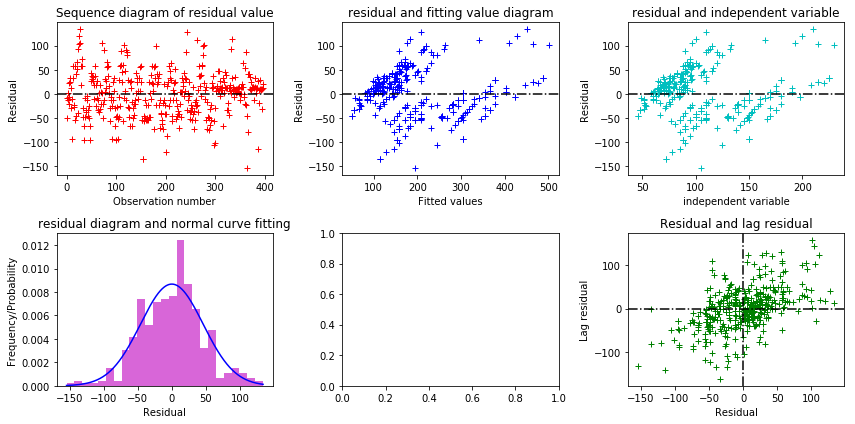

给定点的预测值和预测区间为：
指定点109的预测值是205.20453973150634，置信区间[114.4421447127825, 295.96693475023017]
指定点187的预测值是395.7499964406695，置信区间[304.4576394545816, 487.0423534267574]
指定点211的预测值是454.3793677357967，置信区间[362.7358681421556, 546.0228673294378]


In [16]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as ss
import matplotlib.pyplot as plt
# import pingouin as pg 

class One_Variable_LinearRegression:
    """
    一元线性回归求解
    1、模型系数的求解，置信区间、各种检验
    2、回归诊断
    3、残差分析
    4、各种可视化 
    """
    def __init__(self, url, x_label, y_label): #初始化
        """
        初始化
        url:文件
        x_lable:自变量标签
        y_label:因变量标签
        """
        self.data = pd.read_csv(url).dropna() #读取数据，并删除缺失值
        self.x_label = x_label 
        self.y_label = y_label 
        self.x = self.data.loc[:, self.x_label] #自变量样本数据
        self.y = self.data.loc[:, self.y_label] #因变量样本数据
        
        
        self.n = len(self.x)  #样本量
        self.w = 0  #回归系数
        self.b = 0  #回归系数常数项
        self.yhat = np.empty(self.n) #预测值
        self.rmse = 0.0  #均方根误差
        self.Lxx = 0.0 #Sxx
        self.TSS = 0.0 #总偏差平方和
        self.RSS = 0.0 #残差平方和
        self.ESS = 0.0 #回归平方和
        self.err = np.empty(self.n) #实际残差
        self.sigma_hat = 0.0 #方差的无偏估计  = 残差平方和 / 自由度
        
        
        self.dfd = self.n - 2  #自由度
        self.r2 = 0.0   #可决系数
        self.r2_adj = 0.0  #修正可决系数
        self.F = 0.0 #统计量F值
        self.p = 0.0 #F检验的P值
        self.tp = 0.0 #t值，需要给定自由度和alpha，就像查表
        
    def one_variable_LRM(self):
        """
        一元线性回归正规方程方法求解模型的系数，回归方程: y = w*x+b
        """
        self.w = (self.y * (self.x - self.x.mean())).sum() / ((self.x**2).sum() - self.x.sum()**2 / self.n)
        self.b = (self.y - self.w * self.x).sum() / self.n
        self.yhat = self.w * self.x + self.b #预测值
    
    
    def stats_cal(self):
        """
        各统计量的计算
        """
        self.Lxx = ((self.x - self.x.mean())**2).sum()
        self.TSS = ((self.y - self.y.mean())**2).sum()
        self.RSS = ((self.y - self.yhat)**2).sum()
        self.ESS = ((self.yhat - self.y.mean())**2).sum()
        self.sigma_hat = np.sqrt(self.RSS / self.dfd) 
        alpha = 0.05
        self.tp = ss.t.isf(alpha / 2, df = self.dfd)
        
    def confidence_interval(self):
        """
        回归系数的置信区间
        """
        confidence_w = self.tp * self.sigma_hat / np.sqrt(self.Lxx)
        confidence_b = self.tp * self.sigma_hat * np.sqrt(1 / self.n + self.x.mean()**2 / self.Lxx)
        print("回归系数w的置信区间:[{:.10}, {:.10}]".format(self.w - confidence_w, self.w + confidence_w))
        print("回归系数b的置信区间:[{:.10}, {:.10}]".format(self.b - confidence_b, self.b + confidence_b))
    
    
    def plt_LRM(self):
        """
        可视化:原数据散点图,回归方程，回归系数置信区间，预测置信区间
        """
        plt.figure(figsize = (8, 6))
        plt.plot(self.x, self.y, '+', label = 'Original Data')
        plt.plot(self.x, self.yhat, 'r-', lw = 2, label = 'Linear regression equation')
        confidence = self.tp * self.sigma_hat * np.sqrt(1 / self.n + (self.x - self.x.mean())**2 / self.Lxx)
        plt.plot(self.x, self.yhat - confidence, 'g:', lw = 1, label = 'Confidence Interval sup') #g: 表示绿色的虚线
        plt.plot(self.x, self.yhat + confidence, 'g:', lw = 1, label = 'Confidence Interval inf')
        
        confidence_pred = self.tp * self.sigma_hat * np.sqrt(1 + 1 / self.n + (self.x - self.x.mean())**2 / self.Lxx)
        plt.plot(self.x, self.yhat - confidence_pred, 'grey', lw = 1, label = 'prediction Interval sup') #g: 表示绿色的虚线
        plt.plot(self.x, self.yhat + confidence_pred, 'grey', lw = 1, label = 'prediction Interval inf')
        
        plt.xlabel(self.x_label, fontdict = {'fontsize' : 12})
        plt.ylabel(self.y_label, fontdict = {'fontsize' : 12})
        plt.legend(fontsize = 12)
        plt.title("y = {:.10}*x + {:.10}".format(self.w, self.b),fontdict = {'fontsize' : 14})
        plt.show()  
    
    def r_square(self):
        """
        R2和修正后的R2(给自变量个数添加的惩罚项)
        """
        self.r2 = 1 - self.RSS / self.TSS
        k = 1 #一元线性回归自变量个数是1
        self.r2_adj = 1 - (1 - self.r2) * (self.n - 1) / (self.n - k - 1)
        print("拟合优度R2 = {:.5}   修正R2 = {:.5}".format(self.r2, self.r2_adj))
        
    def f_test(self):
        """
        F检验：检验总体回归关系的显著性
        TSS = ESS + RSS 
        总偏差平方和 = 可解释平方和 + 残差平方和
        F = (ESS / 1) / (RSS / (n - 2)) ~ F(1, n-2)
        """
        self.F = (self.ESS / 1) / (self.RSS / self.dfd)
        self.p = ss.f.sf(self.F, 1, self.dfd) #1和self.dfd 分别是两个自由度，此命令相当于得到在这个自由度下，分位点self.F的右侧面积,即为P值值
        print("F = {:.5f}   P = {:e}".format(self.F, self.p))
        
    def regression_diagnostics(self):
        """
        回归诊断:异常点的识别与处理，在一个回归模型中，异常值点包括离群点，高杠杆值点和强影响点，离群点和高杠杆点都有可能形成强影响点
        强影响点：去掉得到的回归方程和没去掉得到的回归方程相差大，就是强影响点
        高杠杆点：讲是的自变量，某一个样本点的自变量离其他的样本点的自变量很远，则这个点是高杠杆点,一般＞2就判断 
        离群点：残差很大的点是离群点
        标准化残差：相对普通残差来说，消除了量纲的影响
        学生化残差：相对于标准化残差，去除了高杠杆值的影响
        """
        self.err = self.yhat - self.y  #实际残差 #err的数据类型是series
        mse = (self.err**2).mean()  #均方误差
        self.rmse = np.sqrt(mse)  #均方根误差
        zerr = self.err / self.rmse #标准化残差
        outliers = dict() #储存离群值，高杠杆点，强影响点
        #标准化残差
        ind_zerr = zerr[np.abs(zerr) > 2].index.values
        outliers["1. 标准化残差的绝对值大于2的样本序号"] = ind_zerr
        
        #学生化残差
        hi = 1 / self.n + (self.x - self.x.mean())**2 / self.Lxx
        serr = self.err / self.rmse / np.sqrt(1 - hi) #学生化残差
        ind_serr = serr[np.abs(serr) > 2].index.values
        outliers["2. 学生化残差的绝对值大于2的样本序号"] = ind_serr
        
        #高杠杆值识别
        p = 1 #自变量个数
        ind_hi = hi[hi > 2 * (p + 1) / self.n].index.values
        outliers["3. 高杠杆值的样本序号"] = ind_hi
         
        #强影响点的识别(cook距离)
        di = self.err**2 / ((p + 1) * self.rmse**2) * (hi / ((1 - hi)**2)) #cook距离 
        D = di.mean() #cook 距离均值
        ind_di = di[di > 3 * D].index.values
        outliers["4. 强影响点的样本序号"] = ind_di
        print("-" * 100)
        for key in outliers.keys():
            print(key + ":")
            print(outliers[key])
        
        #回归诊断可视化
        plt.figure(figsize = (9, 6))
        ax = plt.subplot(2, 2, 1) #两行两列，第一个位置
        plt.plot(range(len(self.err)), zerr, 'b+') #每个点的标准化残差
        plt.axhline(y = -2, ls = '-.', c= 'r')
        plt.axhline(y = 2, ls = '-.', c= 'r')
        ax.set_xlabel("Observation number")
        ax.set_ylabel("Standardized residuals")
        ax.set_title("Standardized residuals and outliers")
        
        ax = plt.subplot(2, 2, 2) #两行两列，第二个位置
        plt.plot(range(len(self.err)), serr, 'c+') 
        plt.axhline(y = -2, ls = '-.', c= 'r')
        plt.axhline(y = 2, ls = '-.', c= 'r')
        ax.set_xlabel("Observation number")
        ax.set_ylabel("Student residuals")
        ax.set_title("Student residuals and outliers")
        
        ax = plt.subplot(2, 2, 3)
        plt.plot(range(len(self.err)), hi, 'g+') 
        plt.axhline(y = 2 * (p + 1) / self.n, ls = '-.', c= 'r')
        ax.set_xlabel("Observation number")
        ax.set_ylabel("Leverage value")
        ax.set_title("Leverage map and high leverage point")
        
        ax = plt.subplot(2, 2, 4)
        plt.plot(range(len(self.err)), di, 'y+') #
        plt.axhline(y = 3 * D, ls = '-.', c= 'r')
        ax.set_xlabel("Observation number")
        ax.set_ylabel("Cook distance")
        ax.set_title("Cook distance and strong influence point")
        plt.tight_layout()
        plt.show()
        
    def residual_analysis(self):
        """
        残差分析：
        残差值序列图:各预测对应的残差随机地在水平轴上下无规则地波动，说明残差值间相互独立;
        残差与拟合值图:残差基本分布在上下等宽的水平条带内，说明残差值是等方差的，如果残差分布呈现喇叭口形状，
                       则说明残差不满足方差齐性假定，因此应对因变量y做某种变换(如取平方根、取对数、取倒数等)，
                       然后重新拟合;
        残差与自变量图：残差基本分布在左右等宽的水平条带内，说明线性模型与数据拟合较好，如果残差分布在弯曲的
                        条带内，则说明拟合不好，此时可增加x的非线性项，然后重新拟合;
        残差直方图：检验残差正态性;
        残差正态概率图：检验是否服从正态分布;
        残差与滞后残差图:检验残差间是否存在自相关性。从此图可以看出散点均匀分布在四个象限内，说明残差间不存在自相关性；
        """
        plt.figure(figsize = (12, 6))
        #残差值序列图
        ax = plt.subplot(2, 3, 1)
        plt.plot(range(len(self.err)), self.err, 'r+') 
        plt.axhline(y = 0, ls = '-.', c= 'k') #水平参考线
        ax.set_xlabel("Observation number")
        ax.set_ylabel("Residual")
        ax.set_title("Sequence diagram of residual value")
        
        #残差与拟合值图
        ax = plt.subplot(2, 3, 2)
        plt.plot(self.yhat, self.err, 'b+') 
        plt.axhline(y = 0, ls = '-.', c= 'k') #水平参考线
        ax.set_xlabel("Fitted values")
        ax.set_ylabel("Residual")
        ax.set_title("residual and fitting value diagram")
        
        #残差与自变量图
        ax = plt.subplot(2, 3, 3)
        plt.plot(self.x, self.err, 'c+') 
        plt.axhline(y = 0, ls = '-.', c= 'k') #水平参考线
        ax.set_xlabel("independent variable")
        ax.set_ylabel("Residual")
        ax.set_title("residual and independent variable")
        
        #残差直方图
        ax = plt.subplot(2, 3, 4)
        plt.hist(self.err, bins = 25, alpha = 0.6, color = 'm', density = True)
        #极大似然估计法估计残差的均值和标准方差
        err_m, err_std = ss.norm.fit(self.err)
        err_val = np.linspace(min(self.err), max(self.err), 500)
        err_pdf = np.exp(-(err_val - err_m)**2 / (2 * err_std**2)) / (np.sqrt(2 * np.pi) * err_std)
        plt.plot(err_val, err_pdf, 'b-')
        ax.set_xlabel("Residual")
        ax.set_ylabel("Frequency/Probability")
        ax.set_title("residual diagram and normal curve fitting")
        
        #残差正态概率图
        ax = plt.subplot(2, 3, 5)
#         pg.qqplot(self.err, ax = ax)
        
        #残差与滞后残差图
        ax = plt.subplot(2, 3, 6)
        plt.plot(self.err[1:], np.diff(self.err), 'g+')
        plt.axhline(y = 0, ls = '-.', c='k')
        plt.axvline(x = 0, ls = '-.', c='k')
        ax.set_xlabel("Residual")
        ax.set_ylabel("Lag residual")
        ax.set_title("Residual and lag residual")
        
        plt.tight_layout()
        plt.show()
        
    def predict(self, xp):
        y_pred = self.w * xp + self.b #预测值
        confidence_pred = self.tp * self.sigma_hat * np.sqrt(1 + 1 / self.n + (xp - self.x.mean())**2 / self.Lxx)
        y_pred_low, y_pred_up = y_pred - confidence_pred, y_pred + confidence_pred
        print("给定点的预测值和预测区间为：")
        if len(xp) > 1:
            for i in range(len(xp)):
                print("指定点{}的预测值是{}，置信区间[{}, {}]".format(xp[i], y_pred[i], y_pred_low[i], y_pred_up[i]))
        else:
            print("指定点{}的预测值是{}，置信区间是[{}, {}]".format(xp, y_pred, y_pred_low, y_pred_up))
        
        
if __name__ == '__main__':
    url = "MPG.csv"
    ovlr = One_Variable_LinearRegression(url, 'horsepower', 'displacement')  
    ovlr.one_variable_LRM()
    ovlr.stats_cal()
    ovlr.confidence_interval()
    ovlr.plt_LRM()
    ovlr.r_square()
    ovlr.f_test()
    ovlr.regression_diagnostics()
    ovlr.residual_analysis()
    xp = np.array([109, 187, 211])
    ovlr.predict(xp)